>**Alumnos**: *Adrián Ogáyar Sanchez y Arturo Barbero Pérez*

>**Grupo**: *11*

# Regresión lineal regularizada: sesgo y varianza

El objetivo de esta práctica es comprobar los efectos del sesgo y la varianza.
Para esto aplicaremos regresión lineal regularizada para aprender una hipótesis sesgada, que no es capaz de
clasificar correctamente a los ejemplos de entrenamiento, y a continuación usaremos de nuevo la
regresión lineal para sobre-ajustar los datos de entrenamiento a un polinomio de grado superior.

Comenzamos importando las librerías necesarias. Todas ellas han sido utilizadas y explicadas en prácticas anteriores.

In [28]:
from scipy.io import loadmat
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

## Regresión lineal regularizada

Continuamos cargando los datos del fichero *ex5data1.mat* Este fichero contiene una serie de datos de entrenamiento, datos de validación y datos de prueba.

In [29]:
data = loadmat('ex5data1.mat')

X = data['X']
y = data['y']
Xtest = data['Xtest']
ytest = data['ytest']
Xval = data['Xval']
yval = data['yval']

Tras cargar los datos debemos crear una función para calcular el coste y el gradiente de la regresión lineal regularizada que siguen esta expresión:
$$J(\theta)=\frac{1}{2m}(\sum^m_{i=1}(h_\theta(x^{(i)})-y^{(i)})^2)+\frac{\lambda}{2m}(\sum^n_{j=1}\theta^2_j)$$
$$\frac{\delta J(\theta)}{\delta\theta_0}=\frac{1}{m}\sum^m_{i=1}(h_\theta(x^{(i)})-y^{(i)})x^{(i)}_j\quad para\: j = 0$$
$$\frac{\delta J(\theta)}{\delta\theta_0}=\frac{1}{m}\sum^m_{i=1}(h_\theta(x^{(i)})-y^{(i)})x^{(i)}_j+\frac{\lambda}{m}\theta_j\quad para\: j\ge 1$$

In [30]:
h = lambda x, t : t.dot(x.T)

def coste(x, y, theta) :    
    return 1/(2*len(x)) * (np.sum((h(x, theta)-y)**2))

def costeReg(x, y, theta, lamb) :
    return coste(x,y,theta) + lamb/(2*len(x))*np.sum(theta[1:]**2)

def gradiente(x, y, theta, lamb) :
    grad = 1/len(x) * np.matmul((h(x, theta)-y),x)
    grad[1:] += (theta[1:] * lamb/len(x))
    return grad

def regLinealReg(theta, x, y, lamb) :
    y = y.ravel()
    one = np.ones((len(x),1))
    x = np.hstack([one, x])
    return(costeReg(x,y,theta,lamb), gradiente(x,y,theta,lamb))

In [31]:
theta = np.ones((2,))
regLinealReg(theta, X, y, 1)

(303.9931922202643, array([-15.30301567, 598.25074417]))

In [35]:
thetaOpt = opt.minimize(regLinealReg, theta, args = (X, y, 0), method='TNC', jac=True)
thetaOpt = thetaOpt['x']

In [48]:
def graficarDatos(x, y, h0):

    #Establece unos maximos y minimos para los ejes
    ax = plt.gca()
    ax.axis([x.min() - 5, x.max() + 5, y.min() - 10, y.max() + 5])

    #Grafica la recta
    plt.plot([x.min(), x.max()], [h0(x.min()), h0(x.max())], '-b')

    #Grafica los datos
    plt.plot(x, y, 'rx')
    plt.xlabel('Población de la ciudad')
    plt.ylabel('Ingresos en $')
    
    plt.show()
    
    return

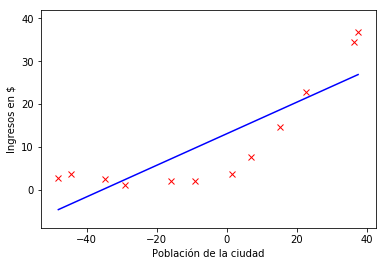

In [49]:
h0 = lambda x: thetaOpt[0] + thetaOpt[1]*x
graficarDatos(X, y, h0)

## Curvas de Aprendizaje

La hipótesis elegida en el apartado anterior, una recta, es demasiado simple para ajustarse a los ejemplos de entrenamiento y por ello predice valores sesgados a la recta. Cuando los ejemplos vienen dados por más atributos no es posible tener una representación gráfica tan evidente. Por ello, se utilizan las curvas de aprendizae para identificar situaciones de sub-ajuste (sesgo) o de sobre-ajuste (varianza).

Para generar las curvas de aprendizaje, tenemos que repetir el entrenamiento por regresión lineal del apartado anterior utilizando diferentes subconjuntos de los datos de entrenamiento. 

Una vez realizado el entrenamiento para ajustarse al subconjunto X[0:i] e y[0:i], tenemos que evaluar el error del resultado aplicado a ese mismo subconjunto, así como el error al clasificar a todos los ejemplos del conjunto de validación (Xval e yval). 

In [ ]:
for i in range(0, len(X)):
    
    regLinealReg(X[0:i], y[0:i], )

## Regresión polinomial